In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Muat data
data = pd.read_csv("Crop_recommendation.csv", sep=';', decimal=',')

# Tampilkan informasi dasar
print(data.info())
print(data.head())
print(data['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            999 non-null    int64  
 1   P            999 non-null    int64  
 2   K            999 non-null    int64  
 3   temperature  999 non-null    float64
 4   humidity     999 non-null    float64
 5   ph           999 non-null    float64
 6   rainfall     999 non-null    float64
 7   label        999 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
label
rice  

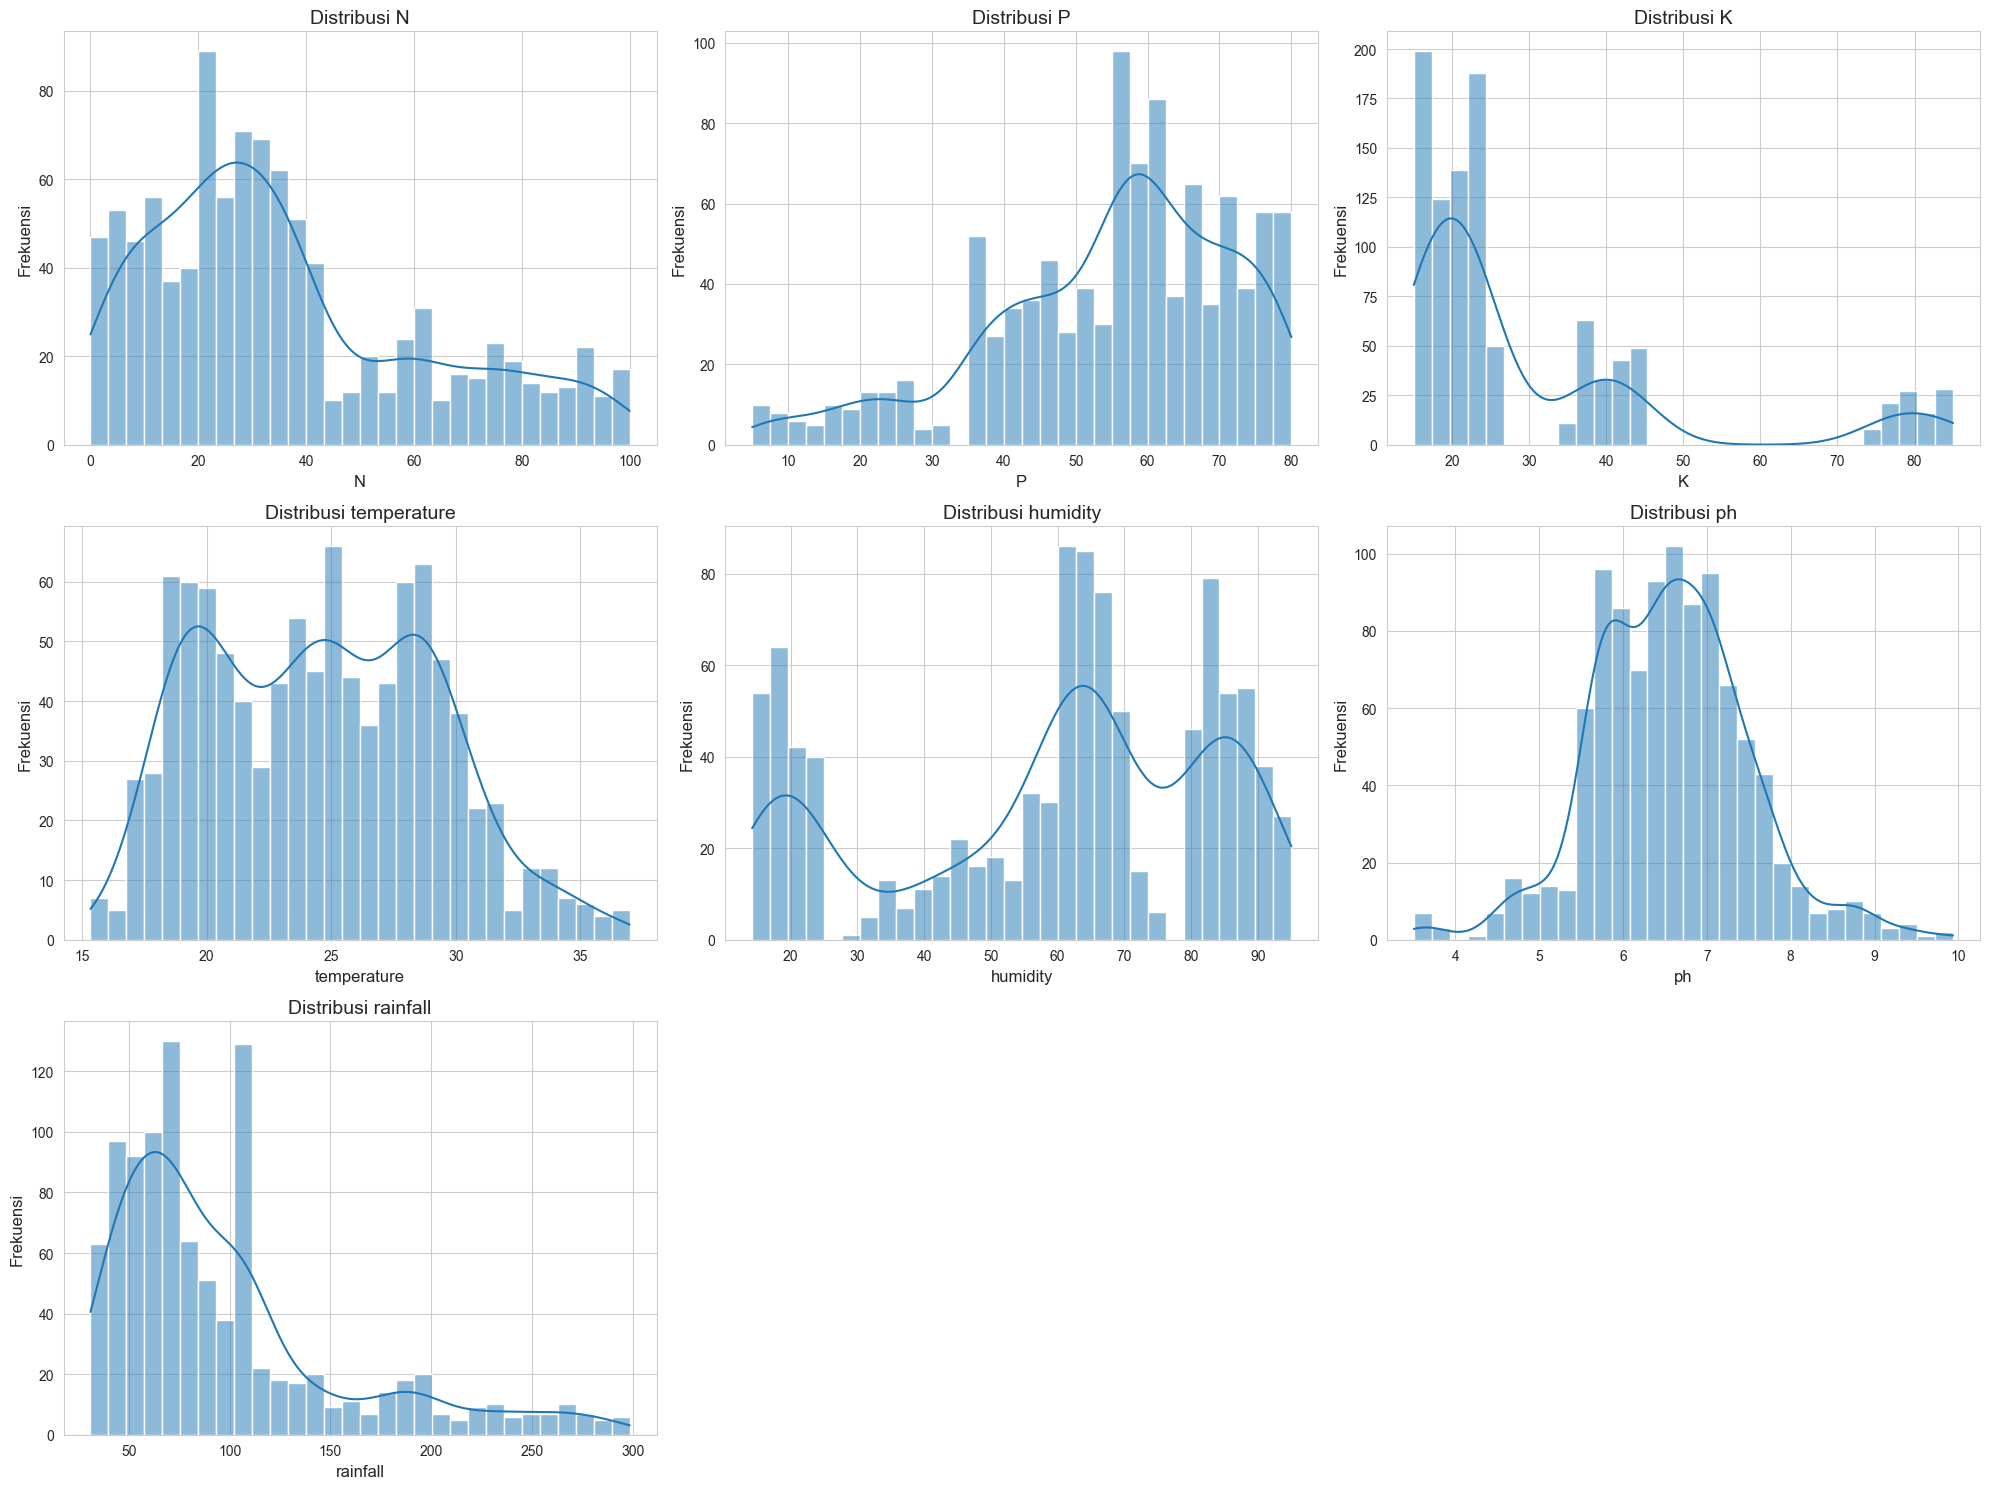

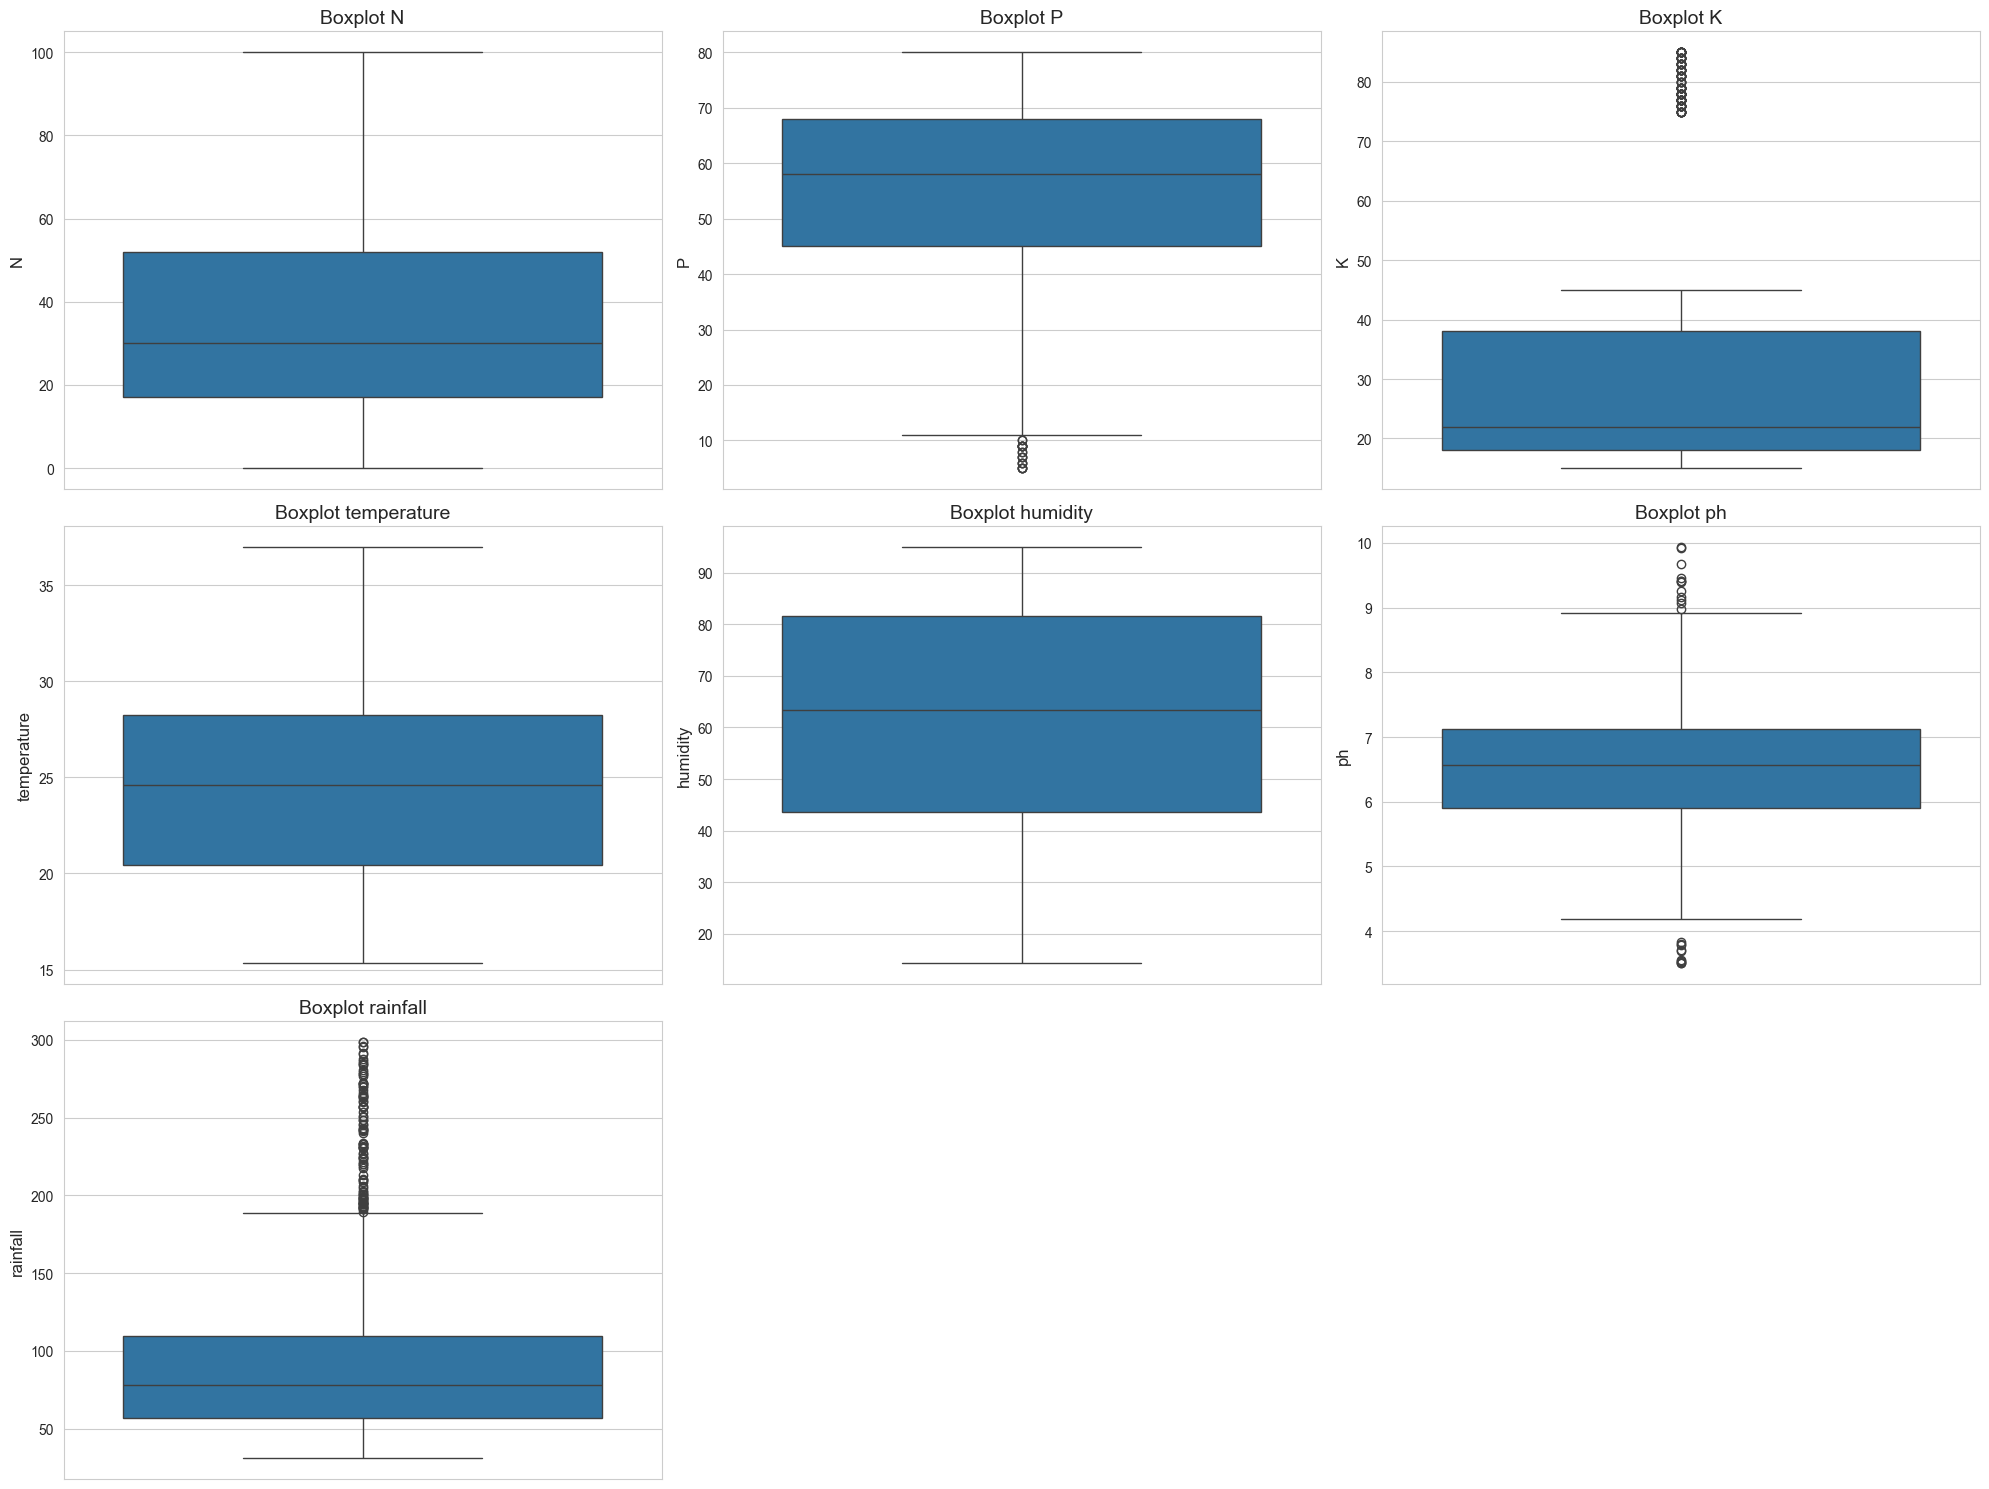

In [23]:
# Set style untuk plot
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))

# List kolom numerik
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Buat histogram untuk setiap parameter
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

# Buat boxplot untuk setiap parameter
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

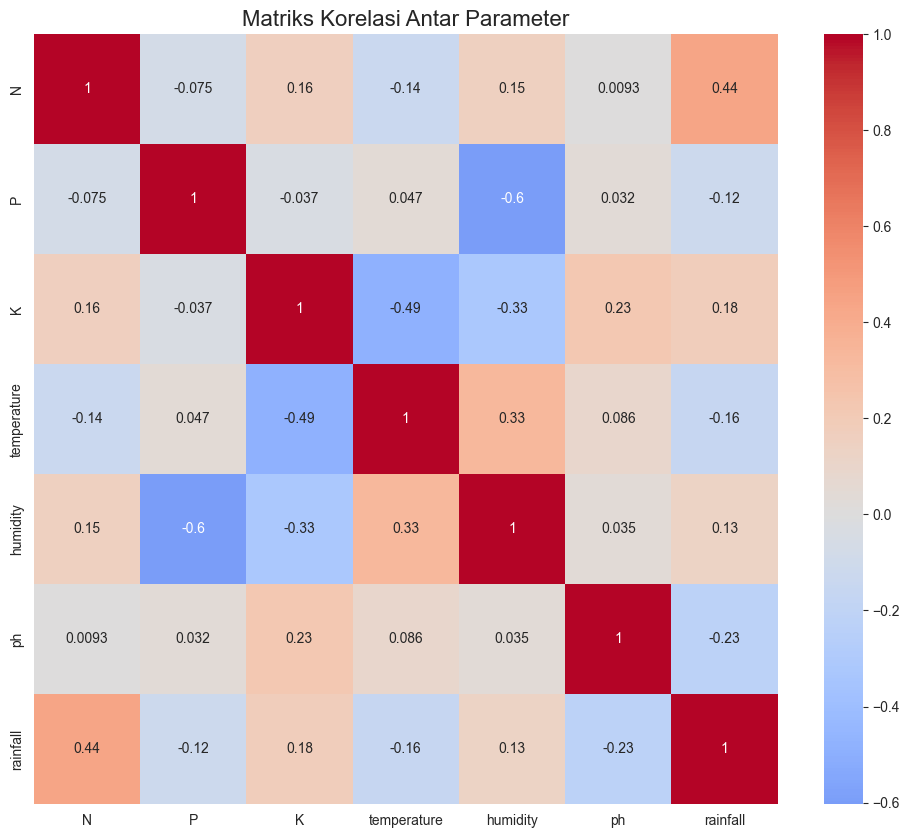

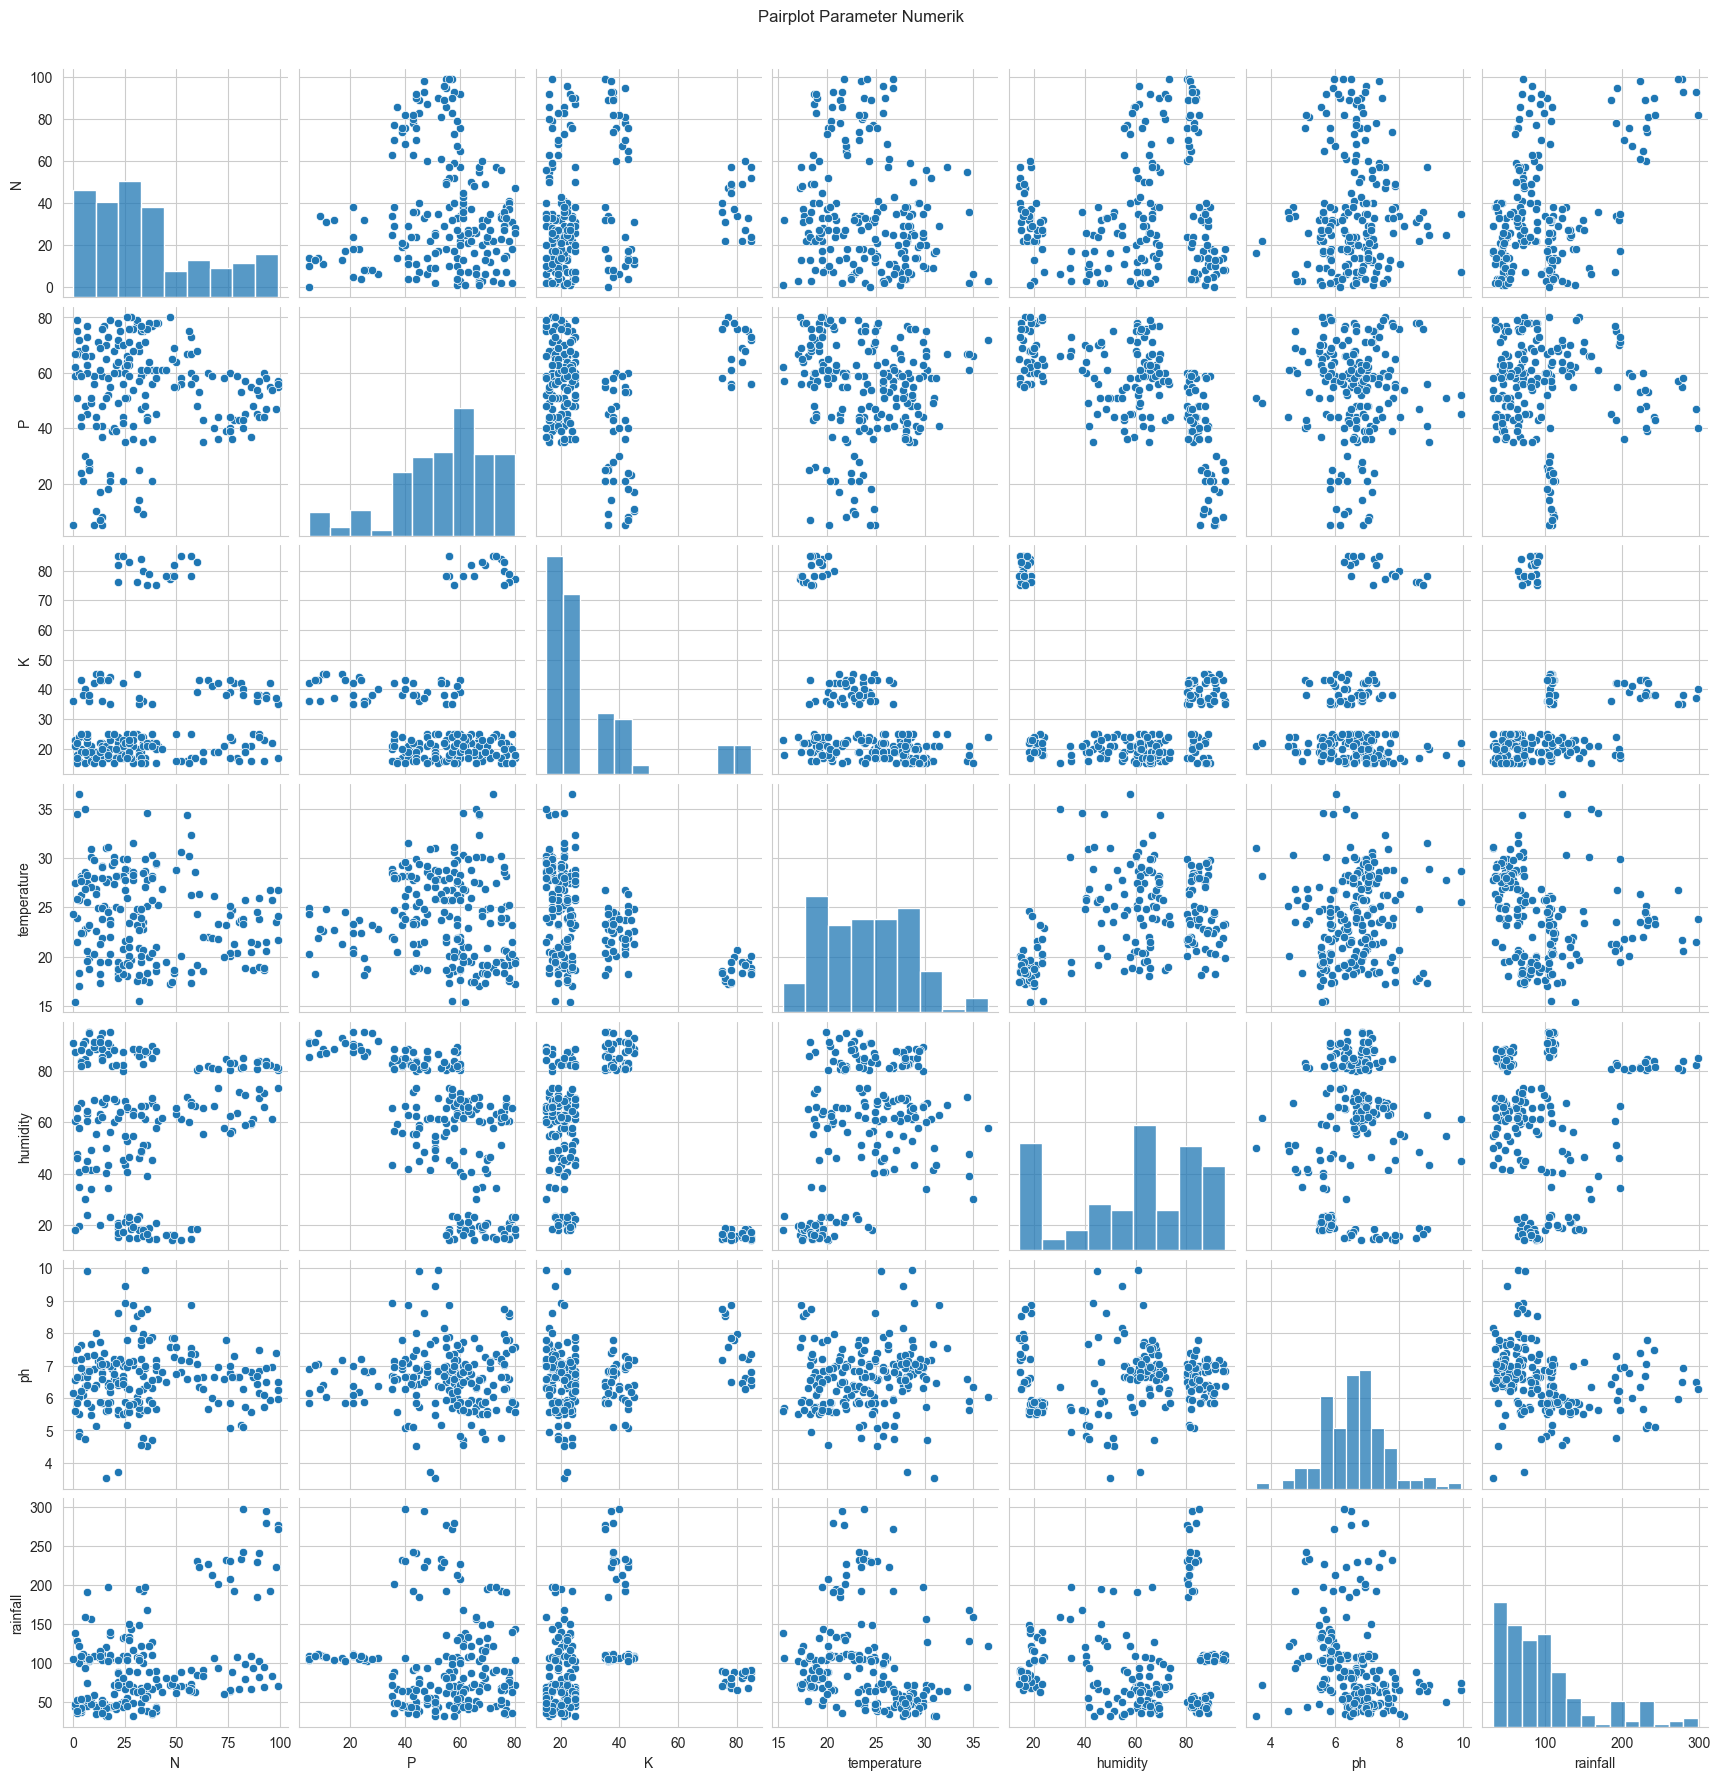

In [24]:
# Matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi Antar Parameter', fontsize=16)
plt.show()

# Pairplot untuk sampel data (karena data besar, kita ambil sampel)
sns.pairplot(data.sample(200)[numeric_cols])
plt.suptitle('Pairplot Parameter Numerik', y=1.02)
plt.show()

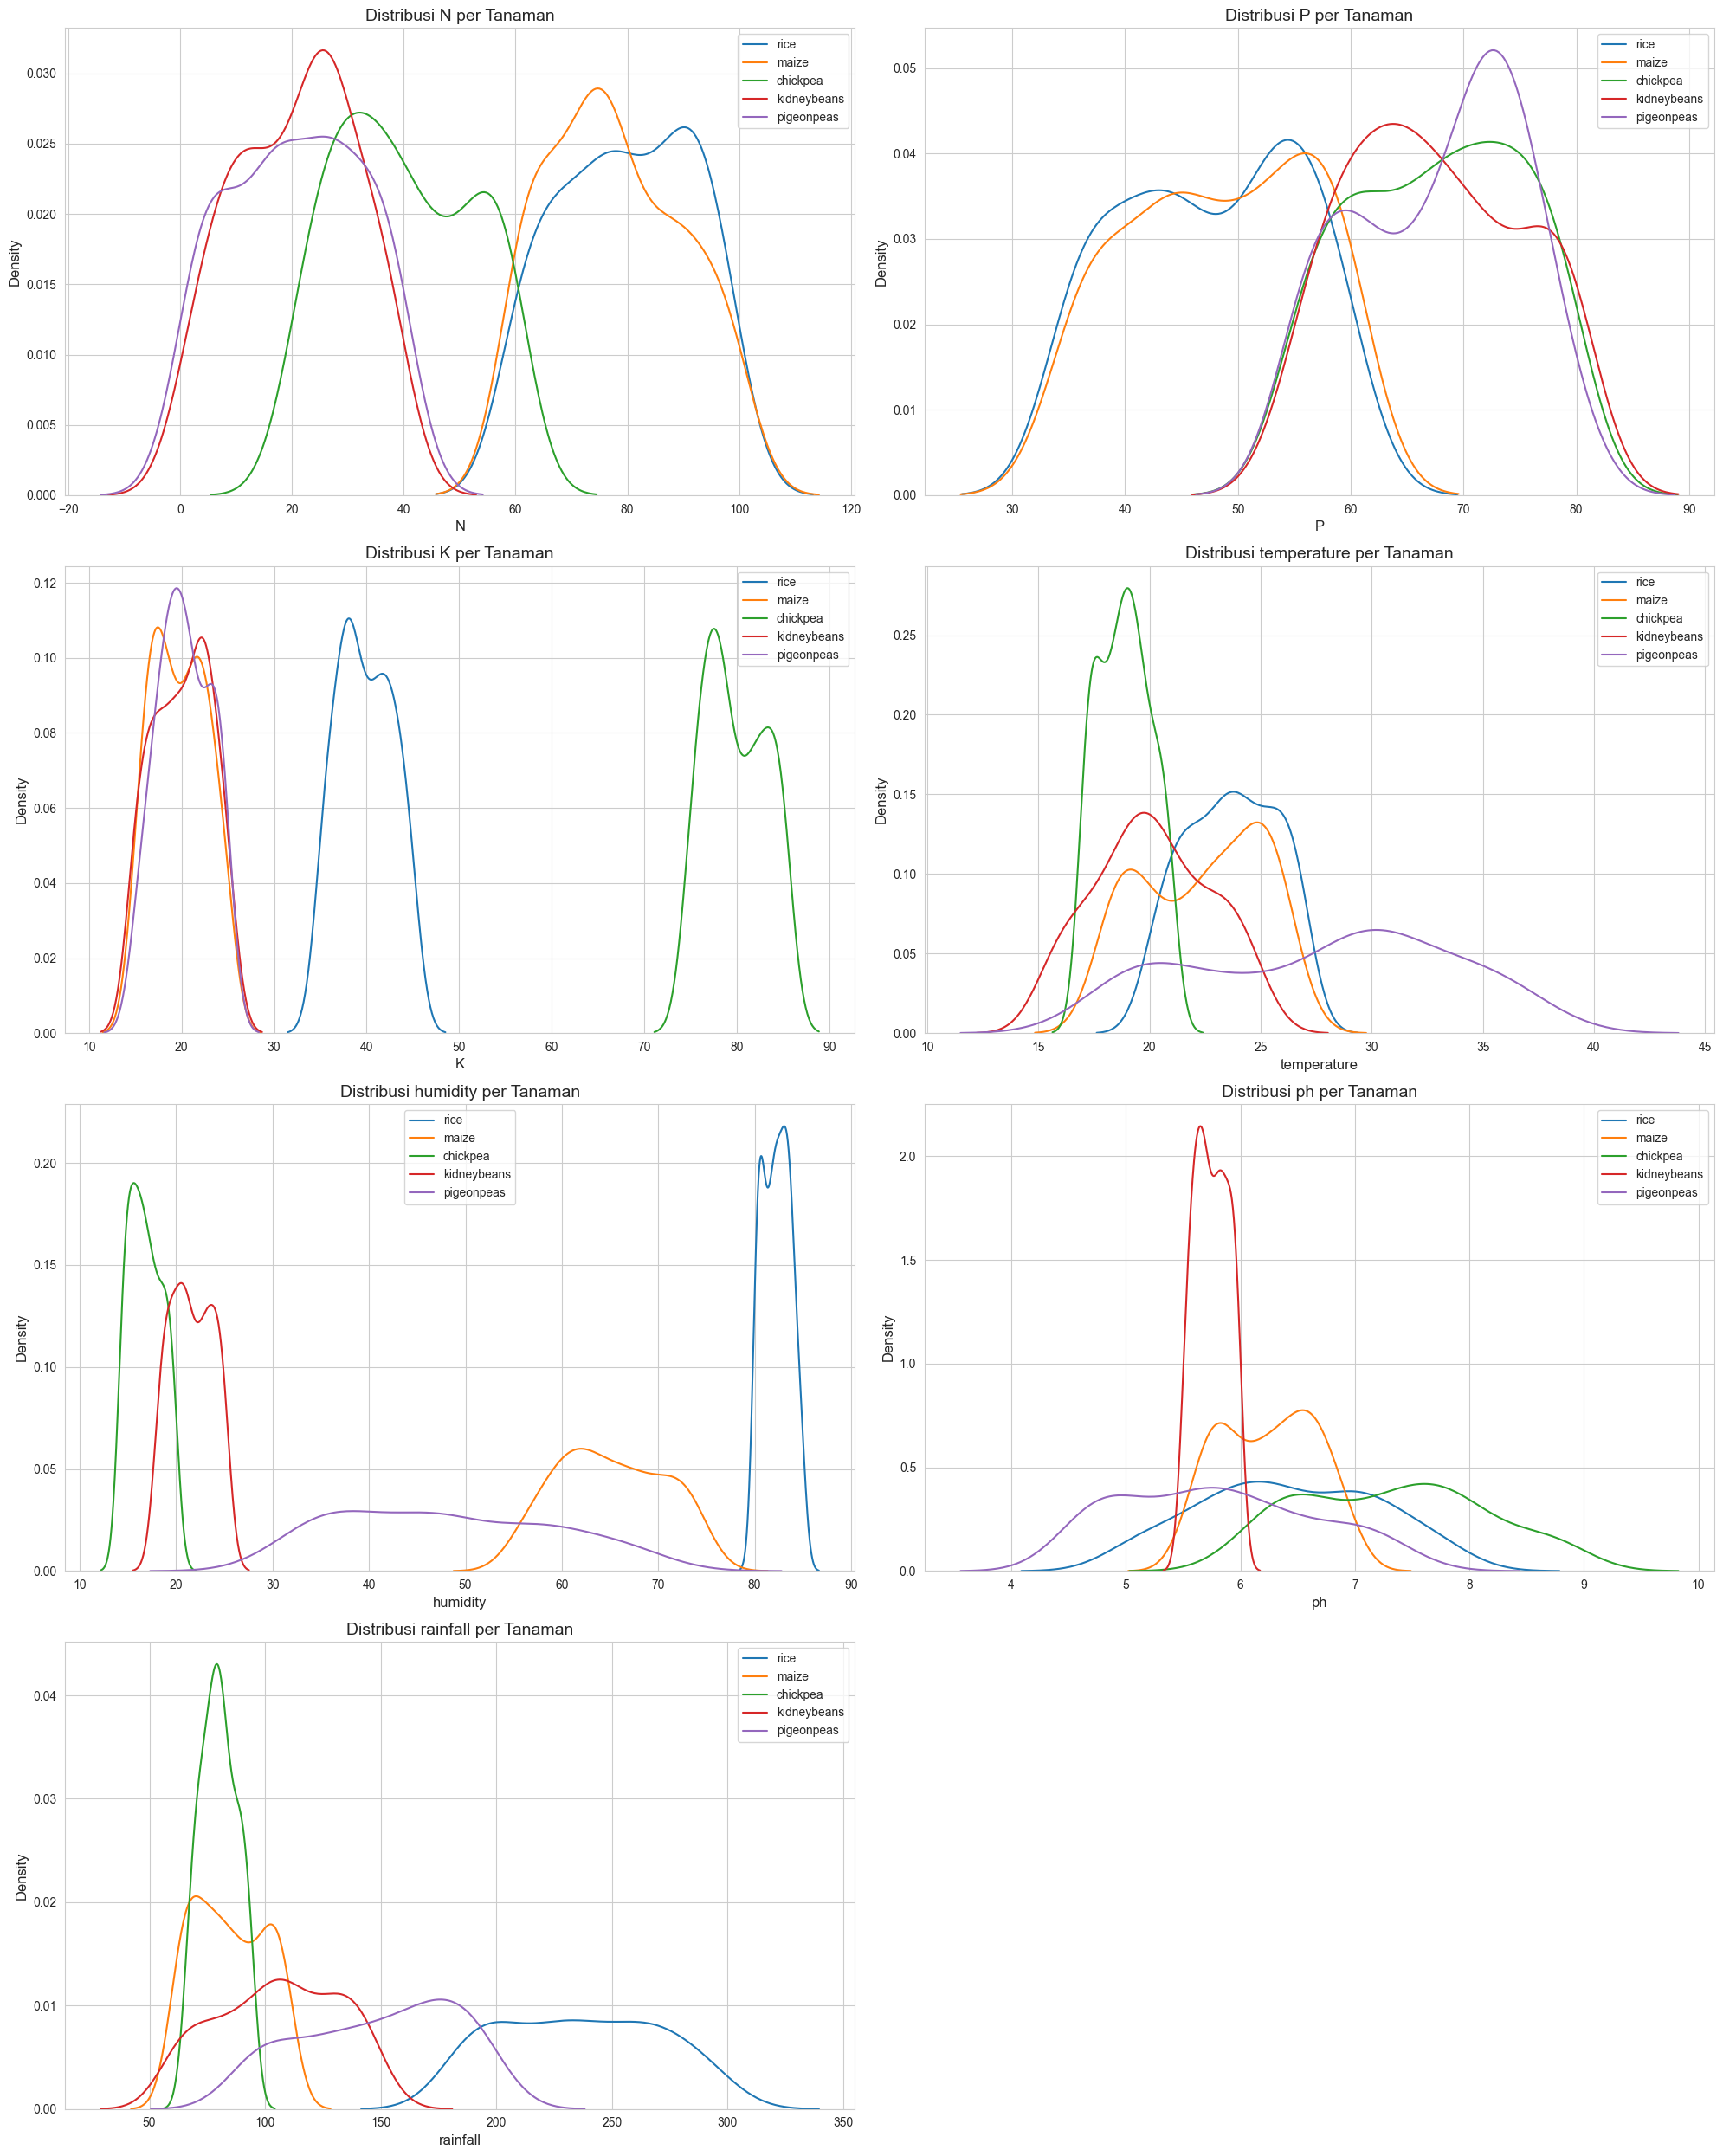

In [25]:
# Ambil 5 tanaman dengan sampel terbanyak untuk visualisasi yang lebih jelas
top_crops = data['label'].value_counts().index[:5]

plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    for crop in top_crops:
        sns.kdeplot(data[data['label']==crop][col], label=crop)
    plt.title(f'Distribusi {col} per Tanaman', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()

Akurasi: 0.995

Laporan Klasifikasi:
               precision    recall  f1-score   support

   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.98        20
       maize       1.00      1.00      1.00        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        20
 pomegranate       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


Matriks Konfusi:
 [[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  1  0 19

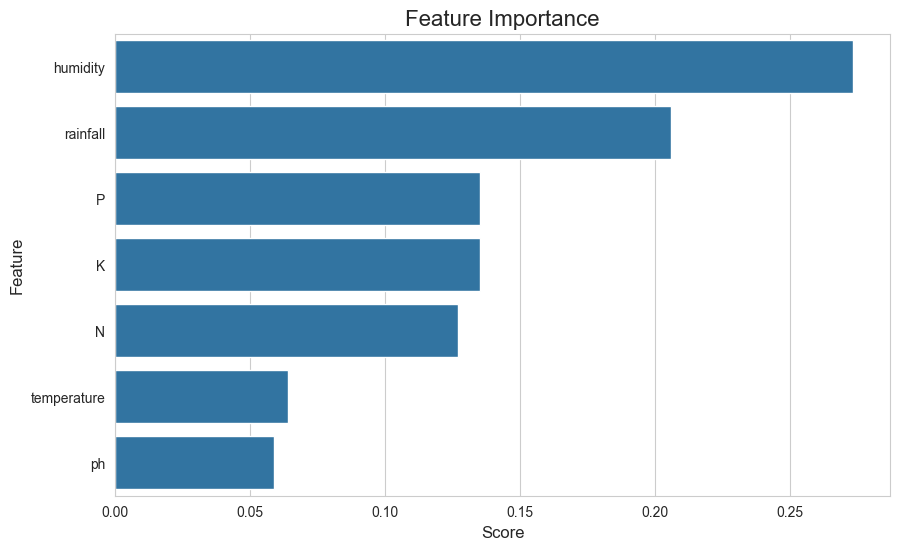

In [26]:
# Pisahkan fitur dan target
X = data.drop('label', axis=1)
y = data['label']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Latih model
rf.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf.predict(X_test_scaled)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("\nMatriks Konfusi:\n", confusion_matrix(y_test, y_pred))

# Visualisasi feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [ ]:
# Tentukan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

# Jalankan Grid Search
grid_search.fit(X_train_scaled, y_train)

# Model terbaik
best_rf = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_rf.predict(X_test_scaled)
print("Akurasi Terbaik:", accuracy_score(y_test, y_pred_best))
print("\nParameter Terbaik:\n", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Akurasi Terbaik: 0.995

Parameter Terbaik:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Buat dataframe dari input
    input_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [ph],
        'rainfall': [rainfall]
    })
    
    # Standardisasi input
    input_scaled = scaler.transform(input_data)
    
    # Prediksi
    prediction = best_rf.predict(input_scaled)
    probabilities = best_rf.predict_proba(input_scaled)
    
    # Dapatkan top 3 rekomendasi
    classes = best_rf.classes_
    proba_df = pd.DataFrame(probabilities, columns=classes)
    top3 = proba_df.T.sort_values(by=0, ascending=False).head(3)
    
    print(f"Rekomendasi Tanaman: {prediction[0]}")
    print("\nTop 3 Rekomendasi:")
    for i, (crop, prob) in enumerate(zip(top3.index, top3.values), 1):
        print(f"{i}. {crop}: {prob[0]*100:.2f}%")
    
    return prediction[0], top3


### PENGGUNAAN OLEH USER

In [21]:
user_N = 30
user_P = 20
user_K = 25
user_temp = 25.5
user_hum = 58
user_ph = 6.7 
user_rain = 200


recommend_crop(user_N, user_P, user_K, user_temp, user_hum, user_ph, user_rain)

Rekomendasi Tanaman: pigeonpeas

Top 3 Rekomendasi:
1. pigeonpeas: 44.00%
2. pomegranate: 38.00%
3. mothbeans: 8.00%


('pigeonpeas',
                 0
 pigeonpeas   0.44
 pomegranate  0.38
 mothbeans    0.08)